In [341]:
import pandas as pd
import numpy as np
import re
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [342]:
df = pd.read_csv('titanic_train.csv')

In [343]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Encoding male - 0 and female - 1

In [344]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [345]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [393]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_1,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.041805,-0.035322,0.081629,0.257307,0.543351,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.349576,0.083081,0.018443,-0.549500,-0.131900,0.221009,0.074053
Age,-0.041805,-0.349576,1.000000,-0.205511,-0.130641,0.115054,-0.081373,-0.065647,0.019145
SibSp,-0.035322,0.083081,-0.205511,1.000000,0.414838,0.159651,0.114631,-0.026354,0.068734
Parch,0.081629,0.018443,-0.130641,0.414838,1.000000,0.216225,0.245489,-0.081228,0.060814
Fare,0.257307,-0.549500,0.115054,0.159651,0.216225,1.000000,0.182333,-0.117216,-0.162184
Sex_1,0.543351,-0.131900,-0.081373,0.114631,0.245489,0.182333,1.000000,0.074115,-0.119224
Embarked_Q,0.003650,0.221009,-0.065647,-0.026354,-0.081228,-0.117216,0.074115,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,0.019145,0.068734,0.060814,-0.162184,-0.119224,-0.499421,1.000000


#### Dropping the features which are not needed to train the model

In [346]:
df = df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [347]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,NaN,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


#### Filling the nan or missing values with a value having highest occurance

In [348]:
total = [df]
df.Embarked.value_counts()
Fre_embarked_package = df.Embarked.mode()
Fre_age_band = df.Age.mode()
for dataset in total:
    dataset['Age']=dataset.Age.fillna(Fre_age_band[0])
    dataset['Embarked']=dataset.Embarked.fillna(Fre_embarked_package[0])

In [349]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,24.0,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [350]:
total = [df]
for dataset in total:
    dataset.loc[dataset['Age']<= 18, 'Age'] = 0
    dataset.loc[(dataset['Age']> 18) & (dataset['Age']<= 32), 'Age'] =1 
    dataset.loc[(dataset['Age']> 32) & (dataset['Age']<=48), 'Age'] = 2
    dataset.loc[(dataset['Age']> 48) & (dataset['Age']<=64), 'Age'] = 3
    dataset.loc[dataset['Age']> 64, 'Age'] = 4

In [351]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,7.2500,S
1,1,1,1,2.0,1,0,71.2833,C
2,1,3,1,1.0,0,0,7.9250,S
3,1,1,1,2.0,1,0,53.1000,S
4,0,3,0,2.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,13.0000,S
887,1,1,1,1.0,0,0,30.0000,S
888,0,3,1,1.0,1,2,23.4500,S
889,1,1,0,1.0,0,0,30.0000,C


In [352]:
df.Embarked.isna().mean()

0.0

In [353]:
df=pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_1,Embarked_Q,Embarked_S
0,0,3,1.0,1,0,7.2500,0,0,1
1,1,1,2.0,1,0,71.2833,1,0,0
2,1,3,1.0,0,0,7.9250,1,0,1
3,1,1,2.0,1,0,53.1000,1,0,1
4,0,3,2.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,0,0,13.0000,0,0,1
887,1,1,1.0,0,0,30.0000,1,0,1
888,0,3,1.0,1,2,23.4500,1,0,1
889,1,1,1.0,0,0,30.0000,0,0,0


In [354]:
df.Fare.isna().sum()
df.Age.isna().sum()

0

In [355]:
x = df.drop('Survived', axis=1)
y = df['Survived']
x

,Pclass,Age,SibSp,Parch,Fare,Sex_1,Embarked_Q,Embarked_S
0,3,1.0,1,0,7.2500,0,0,1
1,1,2.0,1,0,71.2833,1,0,0
2,3,1.0,0,0,7.9250,1,0,1
3,1,2.0,1,0,53.1000,1,0,1
4,3,2.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...
886,2,1.0,0,0,13.0000,0,0,1
887,1,1.0,0,0,30.0000,1,0,1
888,3,1.0,1,2,23.4500,1,0,1
889,1,1.0,0,0,30.0000,0,0,0


In [356]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [357]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [358]:
pca_x_train = X_train
pca_x_test = X_test
pca_y_train = y_train
pca_y_test = y_test
pca_y_train

35     0
46     0
453    1
291    1
748    0
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 668, dtype: int64

## Model 1 : Logistic Regression

Performing logistic regression on Test data

In [359]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_1 = logreg.predict(X_test)
acc_log = accuracy_score(y_test, Y_pred_1) * 100
acc_log

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


78.9237668161435

checking the same LR model on Train data to verify overfitting

In [360]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_1 = logreg.predict(X_train)
acc_log1 = accuracy_score(y_train, Y_pred_1) * 100
acc_log1

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.53892215568862

## Model 2 : SVC

Performing SVC on Test data

In [361]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred_2 = svc.predict(X_test)
acc_svc = accuracy_score(y_test, Y_pred_2) * 100
acc_svc

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


77.57847533632287

Performing SVC on Train data

In [362]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred_2 = svc.predict(X_train)
acc_svc1 = accuracy_score(y_train, Y_pred_2) * 100
acc_svc1

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


86.07784431137725

## Model 3 : KNN

Performing KNN on Test data

In [363]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
Y_pred_3 = knn.predict(X_test)
acc_knn = accuracy_score(y_test, Y_pred_3) * 100
acc_knn

73.09417040358744

Performing KNN on Train data

In [364]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
Y_pred_3 = knn.predict(X_train)
acc_knn1 = accuracy_score(y_train, Y_pred_3) * 100
acc_knn1

79.34131736526946

## Model 4 : Decision Tree

Performing Decision tree classification on Test Data

In [365]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_4 = decision_tree.predict(X_test)
acc_decision_tree2 = accuracy_score(y_test, Y_pred_4) * 100
acc_decision_tree2

76.68161434977578

Performing Decision tree classification on Train Data

In [366]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_4 = decision_tree.predict(X_train)
acc_decision_tree1 = accuracy_score(y_train, Y_pred_4) * 100
acc_decision_tree1

94.91017964071857

## Model 5 : Random Forest

Performing RF on Test data

In [367]:
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train,y_train)
Y_pred_5= random_forest.predict(X_test)
acc_rf = accuracy_score(y_test, Y_pred_5) * 100
acc_rf


80.71748878923766

Performing RF on Train data

In [368]:
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train,y_train)
Y_pred_5= random_forest.predict(X_train)
acc_rf1 = accuracy_score(y_train, Y_pred_5) * 100
acc_rf1



94.91017964071857

# Now applying PCA on same Test and train data set

In [369]:
new_pca = PCA(n_components=2)

d1 = new_pca.fit_transform(pca_x_train.loc[:,['Pclass','Age','SibSp','Parch','Fare','Sex_1','Embarked_Q','Embarked_S']])
pca_x_train['col1']=d1[:,0]
pca_x_train['col2']=d1[:,1]
pca_x_train=pca_x_train.drop(['Pclass','Age','SibSp','Parch','Fare','Sex_1','Embarked_Q','Embarked_S'],axis=1)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [370]:
pca_x_train

,col1,col2
35,20.442247,-0.468618
46,-16.077953,0.487643
453,57.547405,-0.975919
291,59.519196,-0.050064
748,21.539688,-0.043304
...,...,...
715,-23.932261,-0.230441
767,-23.829621,-0.189106
72,41.923102,-0.565366
235,-24.030361,-0.155354


In [371]:
d2=new_pca.fit_transform(pca_x_test.loc[:,['Pclass','Age','SibSp','Parch','Fare','Sex_1','Embarked_Q','Embarked_S']])
pca_x_test['col1']=d2[:,0]
pca_x_test['col2']=d2[:,1]

pca_x_test=pca_x_test.drop(['Pclass','Age','SibSp','Parch','Fare','Sex_1','Embarked_Q','Embarked_S'],axis=1)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [372]:
pca_x_test

,col1,col2
862,-8.162249,-1.053875
223,-26.210875,-0.451395
84,-23.599839,-0.399416
680,-25.966820,-0.442237
535,-7.845822,0.295418
...,...,...
506,-8.093526,-0.140682
467,-7.541823,-1.307570
740,-4.094214,-0.875746
354,-26.880306,-0.476069


In [373]:
## Model 1 : Logistic Regression

#Performing logistic regression on Test data

logreg = LogisticRegression()
logreg.fit(pca_x_train, pca_y_train)
Y_pred_1 = logreg.predict(pca_x_test)
pca_acc_log = accuracy_score(pca_y_test, Y_pred_1) * 100
print("Accuracy of LR")
print(pca_acc_log)

#checking the same LR model on Train data to verify overfitting

logreg = LogisticRegression()
logreg.fit(pca_x_train, pca_y_train)
Y_pred_1 = logreg.predict(pca_x_train)
p_acc_log1 = accuracy_score(pca_y_train, Y_pred_1) * 100


## Model 2 : SVC

#Performing SVC on Test data

svc = SVC()
svc.fit(pca_x_train, pca_y_train)
Y_pred_2 = svc.predict(pca_x_test)
pca_acc_svc = accuracy_score(pca_y_test, Y_pred_2) * 100
print("Accuracy of SVC")
print(pca_acc_svc)

#Performing SVC on Train data

svc = SVC()
svc.fit(pca_x_train, pca_y_train)
Y_pred_2 = svc.predict(pca_x_train)
p_acc_svc1 = accuracy_score(pca_y_train, Y_pred_2) * 100


## Model 3 : KNN

#Performing KNN on Test data

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(pca_x_train, pca_y_train)
Y_pred_3 = knn.predict(pca_x_test)
pca_acc_knn = accuracy_score(pca_y_test, Y_pred_3) * 100
print("Accuracy of KNN")
print(pca_acc_knn)

#Performing KNN on Train data

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(pca_x_train, pca_y_train)
Y_pred_3 = knn.predict(pca_x_train)
p_acc_knn1 = accuracy_score(pca_y_train, Y_pred_3) * 100


## Model 4 : Decision Tree

#Performing Decision tree classification on Test Data

decision_tree = DecisionTreeClassifier()
decision_tree.fit(pca_x_train, pca_y_train)
Y_pred_4 = decision_tree.predict(pca_x_test)
pca_acc_decision_tree = accuracy_score(pca_y_test, Y_pred_4) * 100
print("Accuracy of DT")
print(pca_acc_decision_tree)

#Performing Decision tree classification on Train Data

decision_tree = DecisionTreeClassifier()
decision_tree.fit(pca_x_train, pca_y_train)
Y_pred_4 = decision_tree.predict(pca_x_train)
p_acc_decision_tree = accuracy_score(pca_y_train, Y_pred_4) * 100


## Model 5 : Random Forest

#Performing RF on Test data

random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(pca_x_train,pca_y_train)
Y_pred_5= random_forest.predict(pca_x_test)
pca_acc_rf = accuracy_score(pca_y_test, Y_pred_5) * 100
print("Accuracy of RF")
print(pca_acc_rf)


#Performing RF on Train data

random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(pca_x_train,pca_y_train)
Y_pred_5= random_forest.predict(pca_x_train)
p_acc_rf1 = accuracy_score(pca_y_train, Y_pred_5) * 100




Accuracy of LR
62.33183856502242
Accuracy of SVC
65.47085201793722
Accuracy of KNN
63.22869955156951
Accuracy of DT
61.88340807174888
Accuracy of RF
62.78026905829597


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' 

In [374]:
accuracies=[acc_log,acc_svc,acc_knn,acc_decision_tree,acc_rf]
accuracies

[78.9237668161435,
 77.57847533632287,
 73.09417040358744,
 77.57847533632287,
 80.71748878923766]

In [375]:
pca_accuracies=[pca_acc_log,pca_acc_svc,pca_acc_knn,pca_acc_decision_tree,pca_acc_rf]
pca_accuracies

[62.33183856502242,
 65.47085201793722,
 63.22869955156951,
 61.88340807174888,
 62.78026905829597]

In [376]:
lables=['LR','SVC','KNN','DT','RF']

In [377]:
train_accuracies=[acc_log1,acc_svc1,acc_knn1,acc_decision_tree1,acc_rf1]

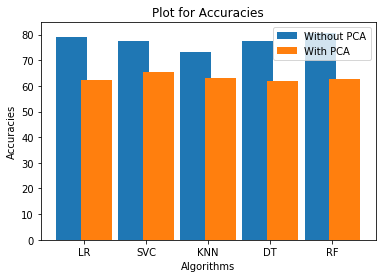

In [391]:
import matplotlib.pyplot as plt

xpos = np.arange(len(lables))

plt.bar(xpos-.2, accuracies,width = .5, label = "Without PCA")
plt.bar(xpos+.2, pca_accuracies,width = .5, label = "With PCA")
plt.xticks(xpos, lables)
plt.xlabel('Algorithms')
plt.ylabel('Accuracies')
plt.title("Plot for Accuracies")
plt.legend(["Without PCA","With PCA"])

### According to the above graph, we can conclude that PCA is suitable only for high dimentional data but not for data sets with less features

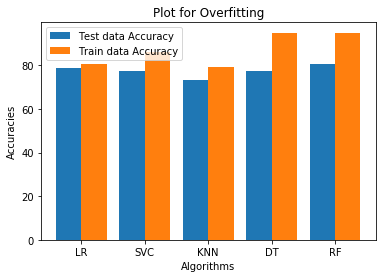

In [390]:
xpos = np.arange(len(lables))

plt.bar(xpos-.2, accuracies,width = .4, label = "Test data Accuracy")
plt.bar(xpos+.2, train_accuracies,width = .4, label = "Train data Accuracy")
plt.xticks(xpos, lables)
plt.xlabel('Algorithms')
plt.ylabel('Accuracies')
plt.title("Plot for Overfitting")
plt.legend(["Test data Accuracy","Train data Accuracy"])

### Based on the above plot, it is observed that Decision Tree and Random Forest models seems to have overfitting problem